In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
source_path = os.getcwd()
training_dir = os.path.join(source_path, 'training' + '/' )
testing_dir = os.path.join(source_path, 'testing' + '/')
print(training_dir)

d:\BANGKIT\CAPSTONE PROJECT\FOODRISM\training/


In [3]:
def train_val_generator(training, validation):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(
        directory=training,
        batch_size=32,
        class_mode='categorical',
        target_size=(150,150)
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation,
        batch_size=32,
        class_mode='categorical',
        target_size=(150,150)
    )

    return train_generator, validation_generator

In [4]:
train_generator, validation_generator = train_val_generator(training_dir, testing_dir)

Found 779 images belonging to 5 classes.
Found 198 images belonging to 5 classes.


In [9]:
def create_model():
    model = tf.keras.models.Sequential([
        # 1
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # 2
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        # 3
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        # 4
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        # flatten
        tf.keras.layers.Flatten(),
        #dropout
        tf.keras.layers.Dropout(0.5),
        # dense
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
        loss = 'categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
model = create_model()

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 256)      

In [12]:
history = model.fit(train_generator,
    epochs=150,
    verbose=1,
    validation_data=validation_generator
)

Epoch 1/150
25/25 [==============================] - 17s 553ms/step - loss: 1.6525 - accuracy: 0.2195 - val_loss: 1.6047 - val_accuracy: 0.2879
Epoch 2/150
25/25 [==============================] - 9s 373ms/step - loss: 1.6055 - accuracy: 0.2619 - val_loss: 1.5988 - val_accuracy: 0.3586
Epoch 3/150
25/25 [==============================] - 9s 374ms/step - loss: 1.5793 - accuracy: 0.2773 - val_loss: 1.5741 - val_accuracy: 0.4798
Epoch 4/150
25/25 [==============================] - 10s 382ms/step - loss: 1.5333 - accuracy: 0.3261 - val_loss: 1.4848 - val_accuracy: 0.4394
Epoch 5/150
25/25 [==============================] - 9s 375ms/step - loss: 1.4358 - accuracy: 0.3825 - val_loss: 1.3863 - val_accuracy: 0.3990
Epoch 6/150
25/25 [==============================] - 9s 363ms/step - loss: 1.4259 - accuracy: 0.3954 - val_loss: 1.3517 - val_accuracy: 0.4444
Epoch 7/150
25/25 [==============================] - 9s 373ms/step - loss: 1.3592 - accuracy: 0.4236 - val_loss: 1.3710 - val_accuracy: 0.42

In [13]:
#tf.saved_model.save(model, source_path)
model.save("foodrism4.model", save_format="h5")

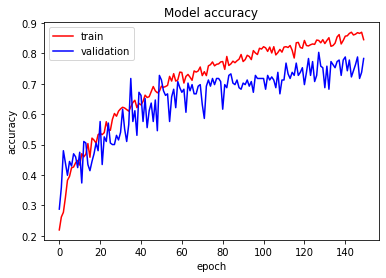

In [14]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('acc4.png')
plt.show()


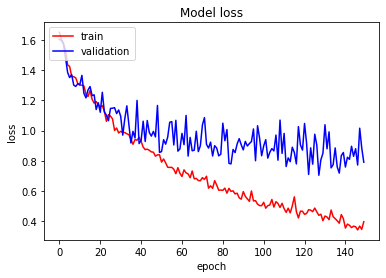

In [15]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('loss4.png')
plt.show()

In [ ]:
fig = plt.gcf()
#fig.set_size_inches(ncols * 4, nrows * 4)
training_name = os.listdir(training_dir + 'Gudeg')
pic_index += 8
next_food_pix = [os.path.join(training_dir, fname) 
                for fname in training_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_food_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

NameError: name 'pic_index' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
training_name = os.listdir(training_dir + 'Gudeg')
print(training_name)

['Gudeg_00000009.jpg', 'Gudeg_00000011.jpg', 'Gudeg_00000014.jpg', 'Gudeg_00000015.jpg', 'Gudeg_00000018.jpg', 'Gudeg_00000019.jpg', 'Gudeg_00000023.jpg', 'Gudeg_00000026.jpg', 'Gudeg_00000031.jpg', 'Gudeg_00000036.jpg', 'Gudeg_00000041.jpg', 'Gudeg_00000042.jpg', 'Gudeg_00000044.jpg', 'Gudeg_00000049.jpg', 'Gudeg_00000055.jpg', 'Gudeg_00000057.jpg', 'Gudeg_00000072.jpg', 'Gudeg_00000077.jpg', 'Gudeg_00000094.jpg', 'Gudeg_00000095.jpg', 'Gudeg_00000097.jpg', 'Gudeg_00000110.jpg', 'Gudeg_00000120.jpg', 'Gudeg_00000121.jpg', 'Gudeg_00000122.jpg', 'Gudeg_00000142.jpg', 'Gudeg_00000150.jpg', 'Gudeg_00000165.jpg', 'Gudeg_00000235.jpg', 'Gudeg_00000240.jpg', 'Gudeg_00000258.jpg', 'Gudeg_00000259.jpg', 'Gudeg_00000322.jpg', 'Gudeg_00000336.jpg', 'Gudeg_00000370.jpg']
